### PCA on Iris dataset
> https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py

In [1]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
# import some data to play with

iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features
y = iris.target

[]

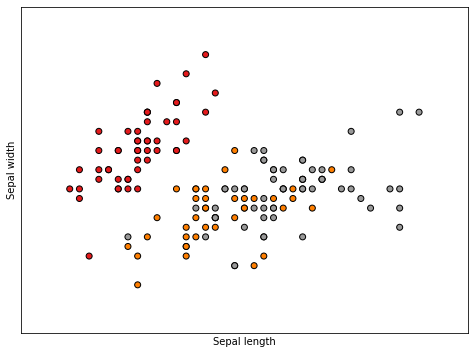

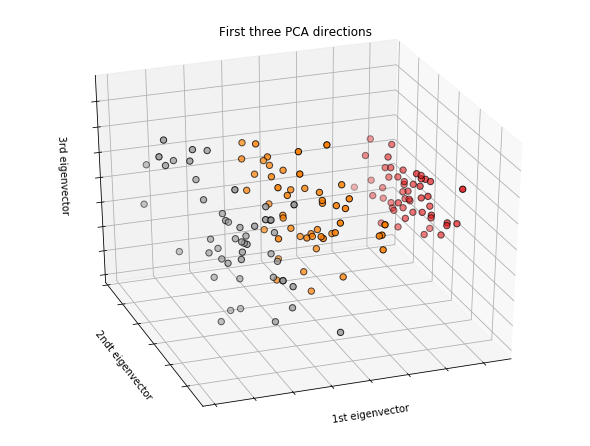

In [13]:
x_min, x_max = X[:, 0].min() -0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() -0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To get a better understanding of interaction of the dimensions
# plot the first three PCA dimensions

fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=-150, azim=110)
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2ndt eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

Text(0, 0.5, 'PC2')

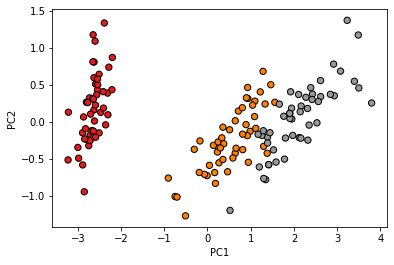

In [11]:
fig, ax = plt.subplots()
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

In [14]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [15]:
pca.explained_variance_ratio_.sum()

0.9947878161267246

In [16]:
X_recovered = pca.inverse_transform(X_reduced)

In [18]:
len(X_recovered)

150

In [19]:
len(iris.data)

150

In [37]:
np.apply_along_axis(np.linalg.norm, 1, iris.data)

array([ 6.34507683,  5.91692488,  5.83609458,  5.7497826 ,  6.32139225,
        6.88621812,  5.8966092 ,  6.23297682,  5.45618915,  5.98999165,
        6.71863081,  6.09918027,  5.83180932,  5.35817133,  7.14982517,
        7.36613874,  6.79852925,  6.34901567,  7.06470098,  6.54140658,
        6.60681466,  6.48922183,  5.92958683,  6.32771681,  6.18465844,
        6.04979338,  6.26737585,  6.44825558,  6.37181293,  5.91016074,
        5.93717104,  6.56734345,  6.79043445,  7.06328535,  5.99249531,
        6.05970296,  6.65056389,  6.2401923 ,  5.48543526,  6.31347765,
        6.24739946,  5.22685374,  5.59732079,  6.33798075,  6.64981203,
        5.83866423,  6.56124988,  5.77927331,  6.63852393,  6.15548536,
        9.12633552,  8.58487041,  9.13673902,  7.29588925,  8.5732141 ,
        7.89113427,  8.67352293,  6.45445583,  8.64985549,  7.17635005,
        6.5       ,  7.98122798,  7.60526134,  8.3468557 ,  7.37699126,
        8.70746806,  7.92842986,  7.6642025 ,  8.11048704,  7.35

In [38]:
# import math
error = abs(iris.data - X_recovered)
# error
np.apply_along_axis(np.linalg.norm, 1, error)

array([2.26243707e-03, 9.90265503e-02, 1.99683897e-02, 7.55758166e-02,
       6.12585926e-02, 2.42008576e-02, 4.81431065e-02, 4.52978706e-02,
       2.67447358e-02, 5.62954013e-02, 1.50199245e-02, 1.56379208e-01,
       7.88791149e-03, 2.16798118e-02, 1.59209718e-01, 6.55154587e-03,
       1.67734737e-01, 7.76281796e-02, 2.70518681e-02, 6.62726502e-02,
       1.50707908e-02, 4.10654027e-02, 4.48212505e-03, 1.48352589e-01,
       3.00330904e-01, 3.46074722e-02, 5.74497158e-02, 1.41727423e-02,
       6.57834667e-02, 1.23983306e-01, 6.04622767e-02, 2.31628492e-01,
       2.81372347e-01, 9.53488583e-02, 1.90703413e-02, 1.62598446e-01,
       1.76441213e-01, 1.68173054e-01, 1.07331474e-02, 1.37491513e-02,
       9.40633590e-02, 3.19987487e-01, 7.46777682e-02, 1.76208890e-01,
       1.82842502e-01, 1.42843574e-01, 1.89622291e-01, 5.95642283e-02,
       4.65686438e-02, 3.46583385e-02, 1.85252879e-02, 5.66512106e-04,
       1.65317587e-03, 9.35668402e-02, 1.12020574e-01, 2.43116767e-01,
      

In [40]:
error_rel = np.apply_along_axis(np.linalg.norm, 1, error)/np.apply_along_axis(np.linalg.norm, 1, iris.data)

In [41]:
print(error_rel.max(), error_rel.min())

0.06121990455150671 1.801336715337445e-05


In [42]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])